In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

{'tf': [226.99359726905823, 233.3732863664627, 324.1611167192459, 555.817884683609, 885.2086259126663], 'retnet': [156.1968810558319, 155.98057162761688, 156.0737282037735, 155.85005145072938, 155.97820990085603]}


([<matplotlib.axis.XTick at 0x1fc764594c0>,
 [Text(256, 0, '256'),
  Text(1024, 0, '1024'),
  Text(2048, 0, '2048'),
  Text(4096, 0, '4096'),
  Text(6144, 0, '6144')])

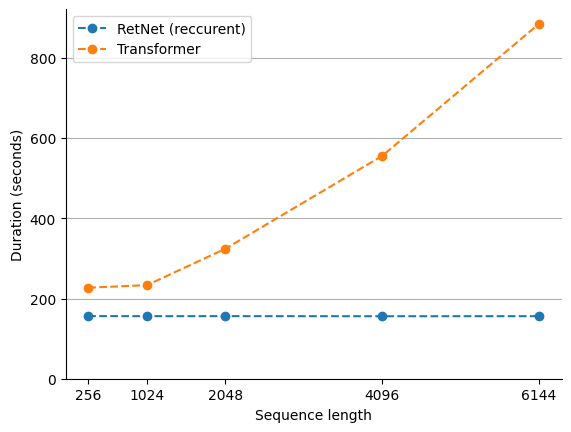

In [2]:
results = {'ckpt_tf_256_p.pt': 226.99359726905823, 
           'ckpt_retnet_256_p.pt': 156.1968810558319, 
           'ckpt_tf_1024_p.pt': 233.3732863664627, 
           'ckpt_retnet_1024_p.pt': 155.98057162761688,
             'ckpt_tf_2048_p.pt': 324.1611167192459, 
             'ckpt_retnet_2048_p.pt': 156.0737282037735,
               'ckpt_tf_4096_p.pt': 555.817884683609, 
               'ckpt_retnet_4096_p.pt': 155.85005145072937,
                 'ckpt_tf_6144_p.pt': 885.2086259126663, 
                 'ckpt_retnet_6144_p.pt': 155.97820990085602}
block_sizes = [256, 1024, 2048, 4096, 6144]
times = {'tf': [], 'retnet': []}
for architecture in ['tf', 'retnet']:
    for block_size in block_sizes:
        model_name = f"ckpt_{architecture}_{block_size}_p.pt"
        time = results[model_name]
        times[architecture].append(time)
print(times)

plt.plot(block_sizes, times['retnet'], linestyle='--', marker='o')
plt.plot(block_sizes, times['tf'], linestyle='--', marker='o')
plt.xlabel('Sequence length')
plt.ylabel('Duration (seconds)')
plt.ylim(ymin=0)
plt.title('')
#plt.spines[['right', 'top']].set_visible(False)
plt.grid(axis='y')
plt.legend(['RetNet (reccurent)', 'Transformer'])
plt.xticks(block_sizes)

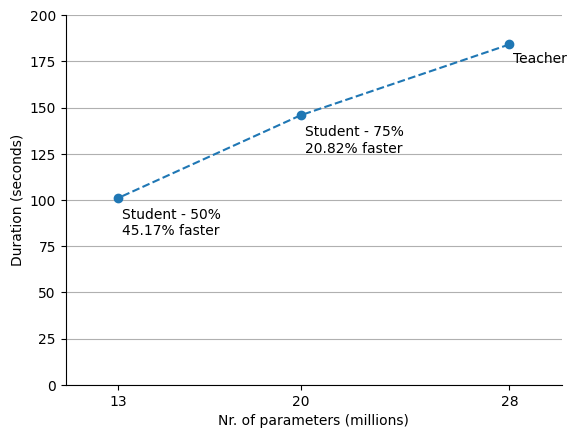

: 

In [37]:
block_sizes = [28, 20, 13]
times= [184.14, 145.80, 100.96]
text_labels = ["Teacher", "Student - 75% \n20.82% faster", "Student - 50% \n45.17% faster"]
plt.plot(block_sizes, times, linestyle='--', marker='o')
plt.xlabel('Nr. of parameters (millions)')
plt.ylabel('Duration (seconds)')
plt.ylim(ymin=0, ymax=200)
plt.xlim(xmin=11, xmax=30)
plt.title('')
#plt.spines[['right', 'top']].set_visible(False)
plt.grid(axis='y')
plt.xticks(block_sizes)

for i, txt in enumerate(text_labels):
    if i == 0:  
        plt.annotate(txt, (block_sizes[i] + 0.15, times[i] - 10))
    else:
        plt.annotate(txt, (block_sizes[i] + 0.15, times[i] - 20))